# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
df = pd.read_csv("Bank_data.csv")

In [3]:
df.describe(include = "all")

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


In [4]:
df.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 8 columns):
Unnamed: 0       518 non-null int64
interest_rate    518 non-null float64
credit           518 non-null float64
march            518 non-null float64
may              518 non-null float64
previous         518 non-null float64
duration         518 non-null float64
y                518 non-null object
dtypes: float64(6), int64(1), object(1)
memory usage: 32.5+ KB


In [6]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

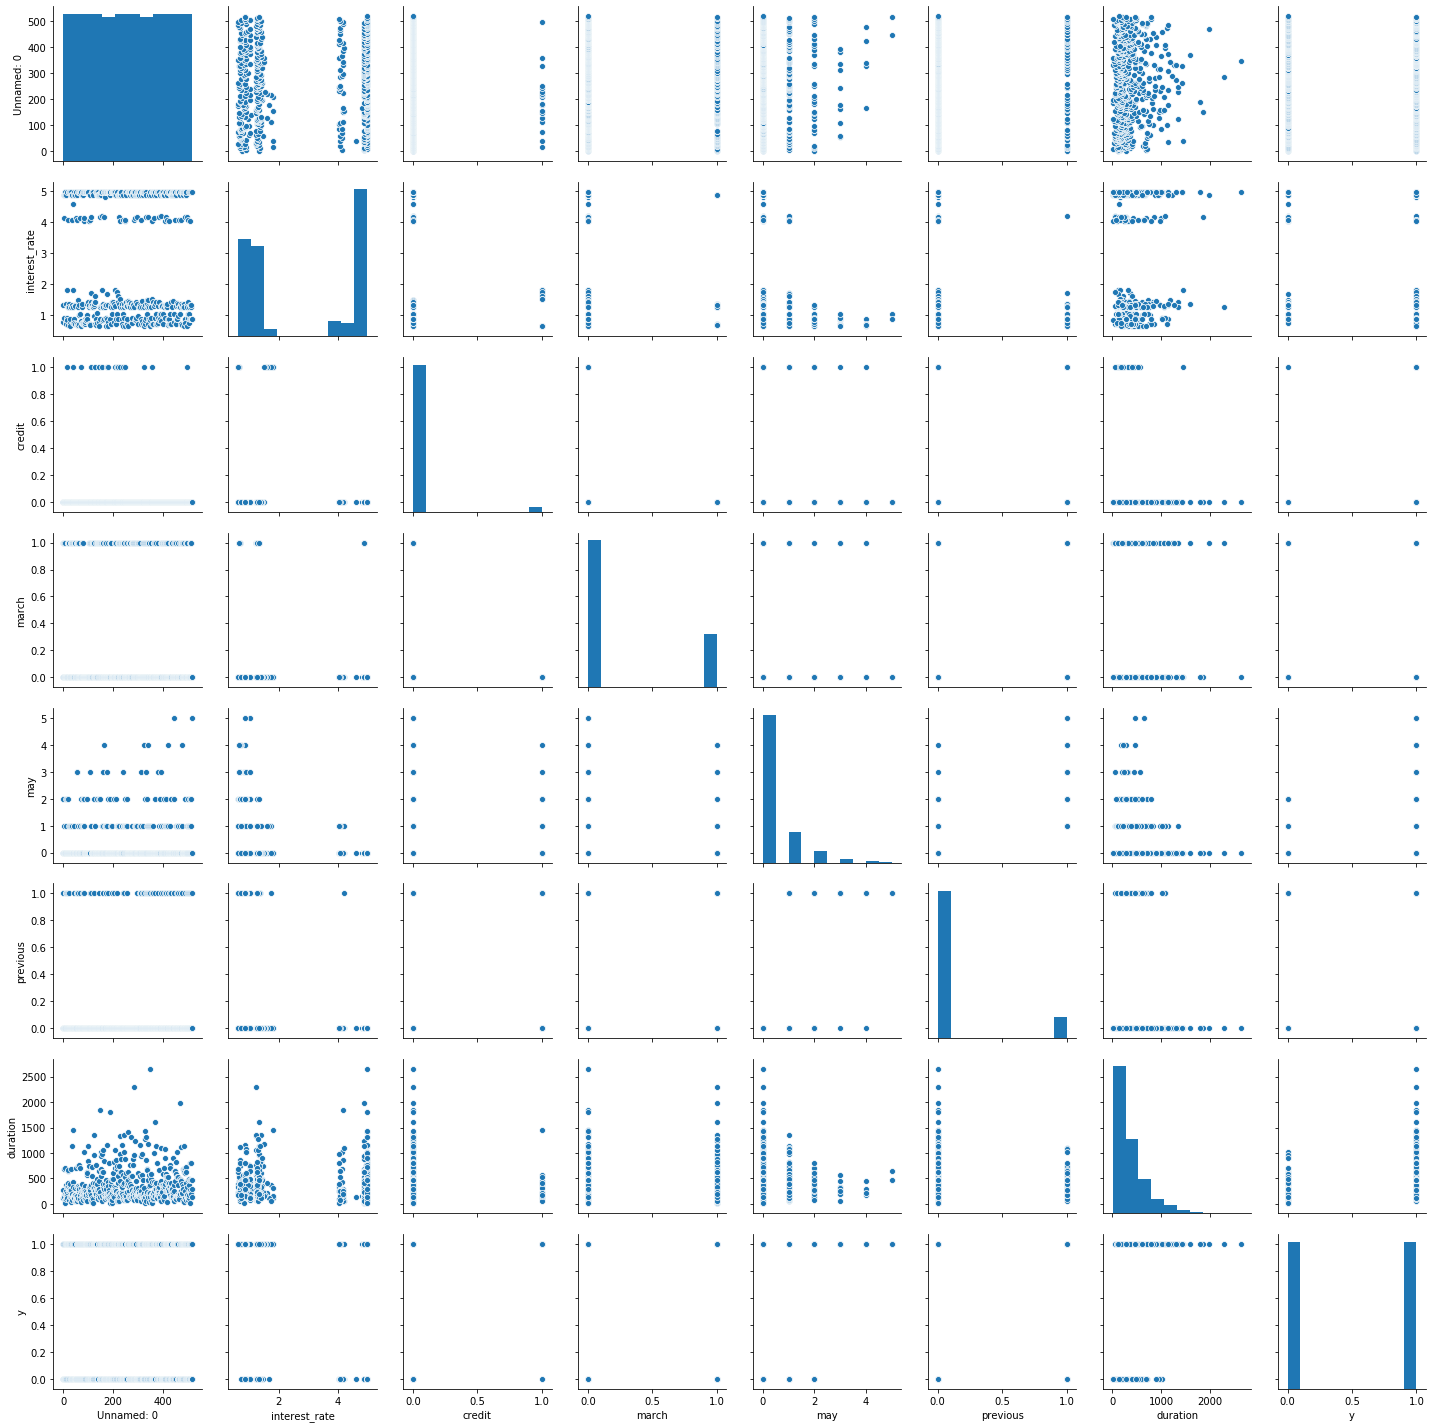

In [7]:
sns.pairplot(df)

### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [8]:
x = df["duration"]
y = df['y']



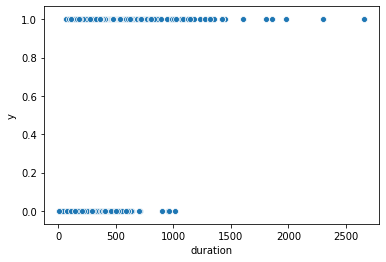

In [9]:
sns.scatterplot(x,y)

In [10]:
x1 = sm.add_constant(x)


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [11]:
reg = sm.Logit(y,x1)

In [12]:
reg_mod = reg.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [13]:
reg_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2121
Time:                        23:33:14   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [14]:
y_pred = reg_mod.predict(x1)

In [15]:
y_pred = np.round(y_pred)
x

0      117.0
1      274.0
2      167.0
3      686.0
4      157.0
5      126.0
6       84.0
7       17.0
8      704.0
9      185.0
10     374.0
11      91.0
12     169.0
13     249.0
14     215.0
15     324.0
16     159.0
17     120.0
18     337.0
19     640.0
20     663.0
21     403.0
22     300.0
23     255.0
24     293.0
25      68.0
26     266.0
27     272.0
28     398.0
29     126.0
       ...  
488    608.0
489    250.0
490    107.0
491    716.0
492    619.0
493    406.0
494     73.0
495    127.0
496    187.0
497    180.0
498    326.0
499    109.0
500    470.0
501     73.0
502    141.0
503    115.0
504    171.0
505    498.0
506    365.0
507     10.0
508    796.0
509    279.0
510    476.0
511    479.0
512    225.0
513    204.0
514    806.0
515    290.0
516    473.0
517    142.0
Name: duration, Length: 518, dtype: float64

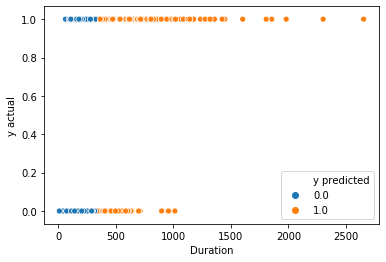

In [16]:
#want to see how model predicts against actual - create scatterplot
df_compare = pd.DataFrame(columns = ["Duration"])
df_compare["Duration"] = x
df_compare["y actual"] = y
df_compare["y predicted"] = y_pred
df_compare

sns.scatterplot(df_compare.Duration, df_compare["y actual"], data = df_compare, hue = "y predicted")

### Simple Logistic Regression

Run the regression and graph the scatter plot.

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [17]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

### Declare the dependent and the independent variables

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.